# Import libraries
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/upload-icon.png?raw=true" width="100"/>

In [1]:
import os
import folium
import geopandas
import numpy as np
import pandas as pd
import missingno as msn
from scipy import stats

pd.options.mode.chained_assignment = None

/opt/conda/lib/python3.7/site-packages/geopandas/_compat.py:115: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  shapely_geos_version, geos_capi_version_string


In [2]:
import seaborn as sns
from matplotlib import style
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from matplotlib.gridspec import GridSpec
from plotly.subplots import make_subplots
from plotly.offline import init_notebook_mode

init_notebook_mode(connected=True)
sns.set()
style.use('fivethirtyeight')

In [3]:
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier

In [4]:
from tensorflow import keras
from tensorflow.keras.utils import plot_model
from sklearn.preprocessing import StandardScaler

# Loading and Checking Dataset
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/add-to-database.png?raw=true" width="100"/>

In [ ]:
data = pd.read_csv('Churn_Modelling.csv')

In [6]:
data.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [8]:
data.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

In [9]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
RowNumber,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


# Missing Values
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/missing.png?raw=true" width="100"/>

In [10]:
data.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

<AxesSubplot:>

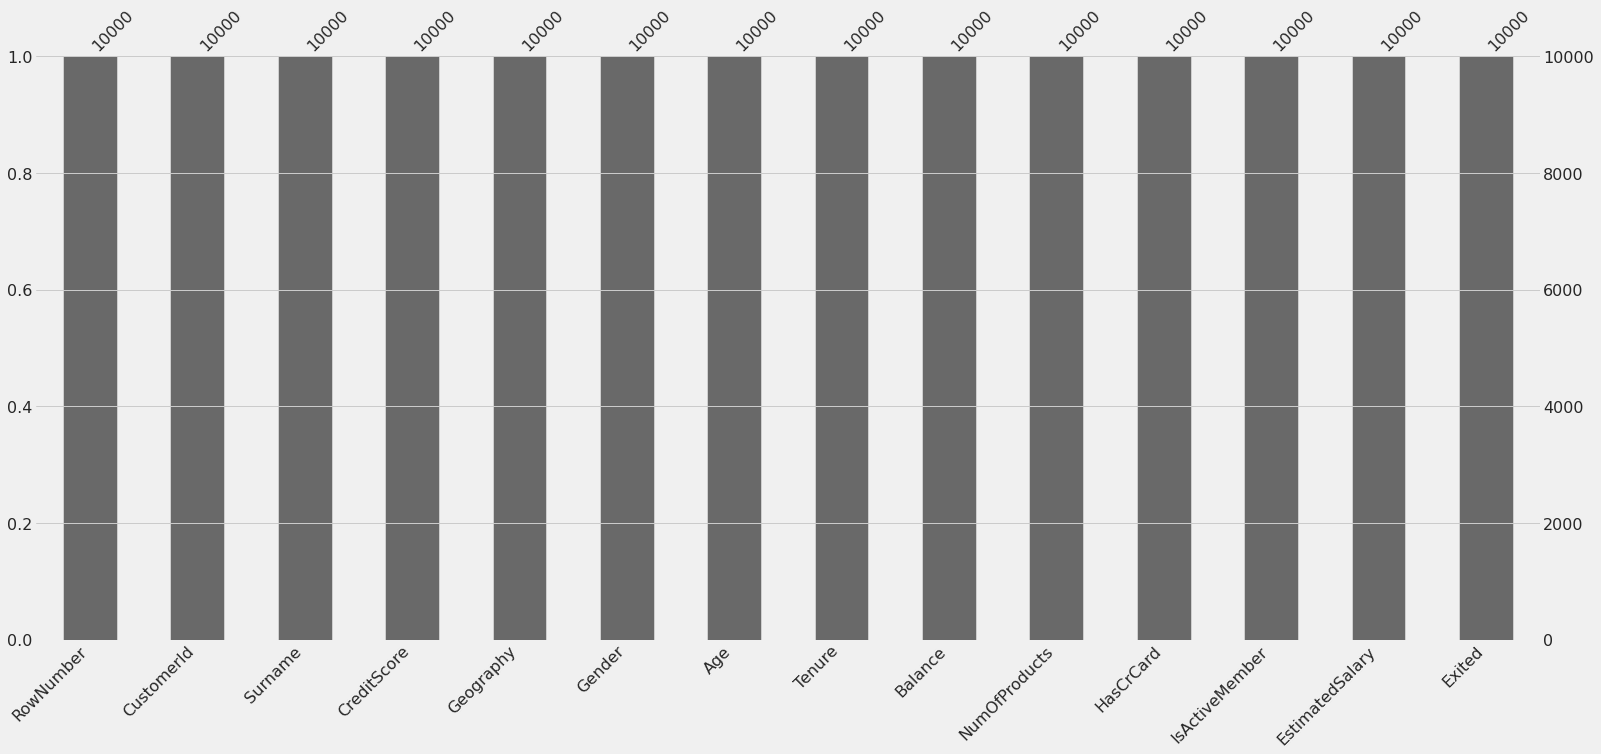

In [11]:
# Excellent !
msn.bar(data)

[Text(0, 0, 'No'), Text(1, 0, 'Yes')]

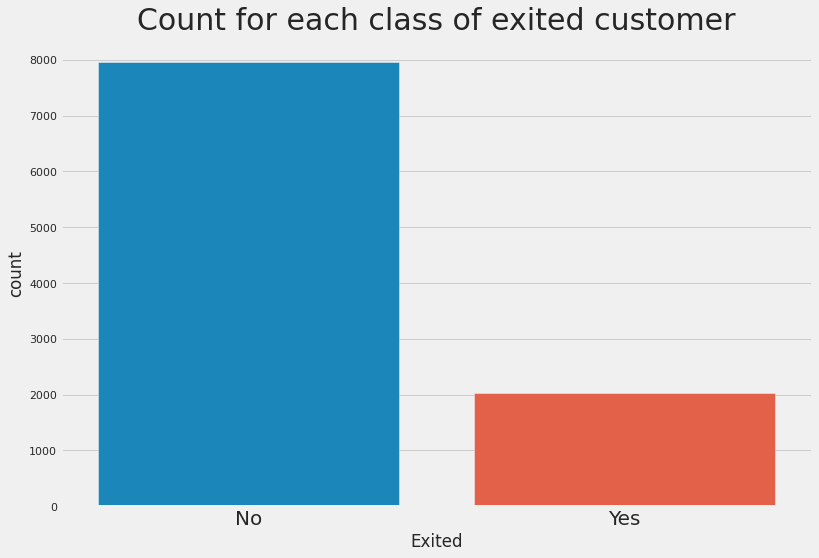

In [12]:
data.Exited.value_counts()
plt.figure(figsize=(12, 8))
exited_plot = sns.countplot(x=data.Exited)
exited_plot.set_title('Count for each class of exited customer',
                      fontsize=30,
                      pad=10)
exited_plot.set_xticklabels(['No', 'Yes'], fontsize=20)

# EDA + FE: Exploratory Data Analysis and Feature Engineering
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/data%20analysis.png?raw=true" width="100"/>

In [13]:
colors = ['lightcoral','deepskyblue',
          'orchid',    'tomato',
          'teal',      'darkcyan',
          'limegreen', 'darkorange']

def distribution_plot(column, title):

    fig = plt.figure(figsize=(17, 7))
    grid = GridSpec(nrows=2, ncols=1, figure=fig)
    color = np.random.choice(colors, 1)[0]

    ax0 = fig.add_subplot(grid[0, :])
    ax0.set_title(f'Histogram and BoxPlot of {title}')
    sns.histplot(column, ax=ax0, color=color)

    ax1 = fig.add_subplot(grid[1, :])
    plt.axis('off')
    sns.boxplot(x=column, ax=ax1, color=color)
    print(f'Skewness for {title} =======>>> {column.skew():.3f}')

### Row Number and CustomerId

These columns aren't needed in the model learning process as
they present information that is not needed
in the learning process

<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/row%20number.png?raw=true" width="100"/>

In [14]:
data.drop(['RowNumber', 'CustomerId'], axis=1, inplace=True)

### Surname
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/surname.png?raw=true" width="100"/>

In [15]:
data.Surname.value_counts().head(30)

Smith       32
Scott       29
Martin      29
Walker      28
Brown       26
Yeh         25
Shih        25
Genovese    25
Maclean     24
Wright      24
Wilson      23
White       23
Ma          23
Fanucci     23
Wang        22
Johnson     22
Moore       22
Chu         22
Lu          22
Thompson    21
Mai         21
McGregor    21
Sun         21
Kao         20
Fang        20
Watson      20
Kennedy     20
Hughes      20
Jamieson    20
Young       20
Name: Surname, dtype: int64

In [16]:
ending_type = []
ending_amount = []

In [17]:
i_sur = data[data.Surname.str[-1]=='i'].Exited.value_counts()
ration = i_sur.iloc[0] / i_sur.iloc[1]

ending_type.append('i')
ending_amount.append(ration)

print(f'Ratio : {ration:.2f}')

Ratio : 4.13


In [18]:
er_sur = data[data.Surname.str[-2:]=='er'].Exited.value_counts()
ration = er_sur.iloc[0] / er_sur.iloc[1]

ending_type.append('er')
ending_amount.append(ration)

print(f'Ratio : {ration:.2f}')

Ratio : 3.94


In [19]:
son_sur = data[data.Surname.str[-3:]=='son'].Exited.value_counts()
ration = son_sur.iloc[0] / son_sur.iloc[1]

ending_type.append('son')
ending_amount.append(ration)

print(f'Ratio : {ration:.2f}')

Ratio : 3.62


In [20]:
ov_sur = data[(data.Surname.str[-2:]=='ov')
              |
              (data.Surname.str[-3:]=='ova')].Exited.value_counts()
ration = ov_sur.iloc[0] / ov_sur.iloc[1]

ending_type.append('ov(ova)')
ending_amount.append(ration)

print(f'Ratio : {ration:.2f}')

Ratio : 3.54


In [21]:
three_sur = data[data.Surname.str.len() <= 3].Exited.value_counts()
ration = three_sur.iloc[0] / three_sur.iloc[1]

ending_type.append('3 char')
ending_amount.append(ration)

print(f'Ratio : {ration:.2f}')

Ratio : 4.03


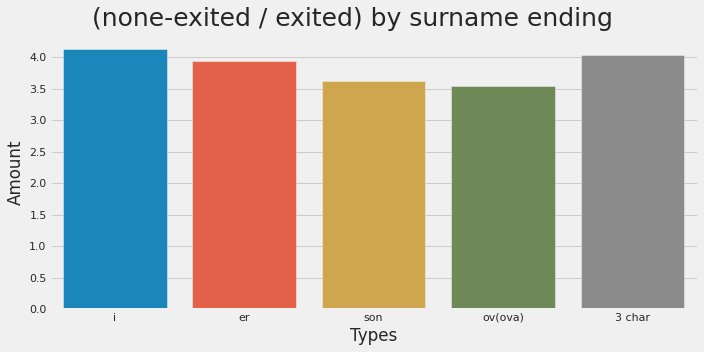

In [22]:
df_surnames = pd.DataFrame({'Types': ending_type,
                            'Amount': ending_amount})

surnames_plot = sns.catplot(x='Types',
                            y='Amount',
                            data=df_surnames,
                            kind='bar',
                            aspect=2)
surnames_plot.fig.suptitle('(none-exited / exited) by surname ending',
                           fontsize=25)
surnames_plot.fig.subplots_adjust(top=0.9)

### Conclusion:

We can notice that the surname has no effect on the ratio of
none-exited / exited customers, so this column should be deleted

In [23]:
data.drop(['Surname'], axis=1, inplace=True)

In [24]:
data.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


### Credit score
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/credit%20score.png?raw=true" width="100"/>

Skewness for Credit score =======>>> -0.072


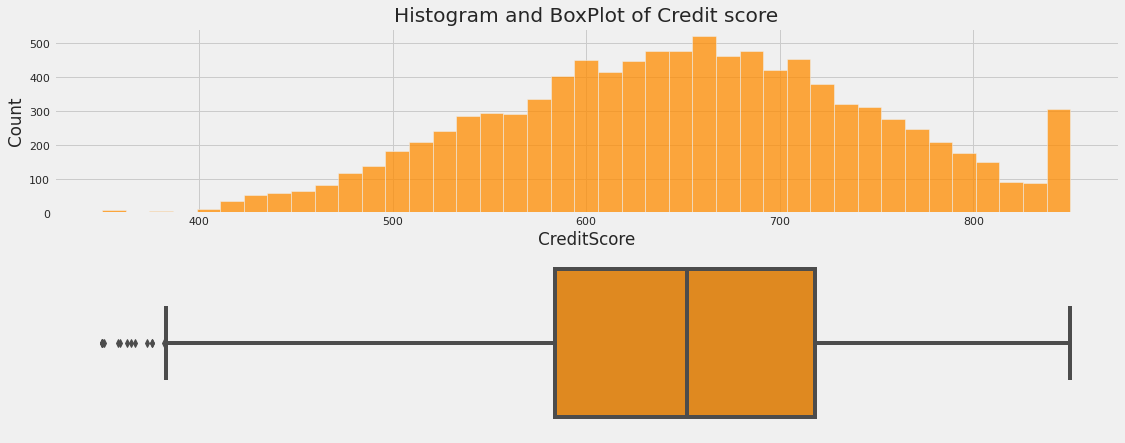

In [25]:
distribution_plot(data.CreditScore, 'Credit score')

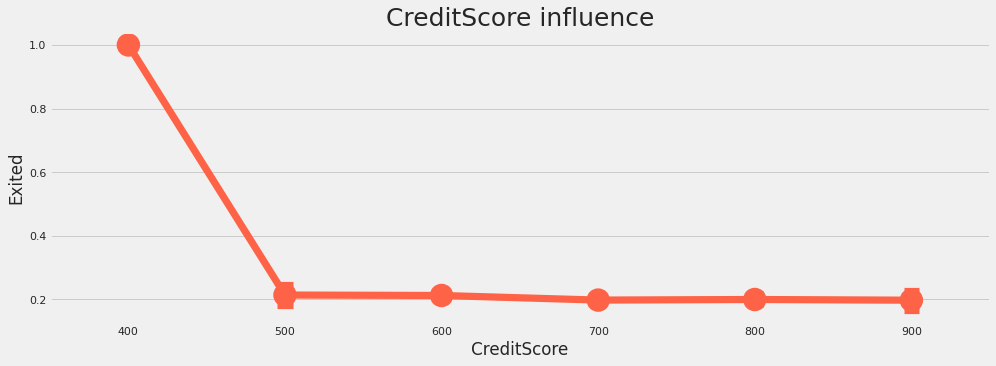

In [26]:
def credit_plot(data):
    
    col_name = 'CreditScore'
    credit_data = data[[col_name, 'Exited']]
    credit_data[col_name] = pd.cut(credit_data[col_name],
                               bins=[0, 400, 500, 600, 700, 800, 900],
                               labels=[400, 500, 600, 700, 800, 900])

    color = np.random.choice(colors, 1)[0]
    plt.figure(figsize=(15, 5))
    sns.pointplot(x=col_name, y='Exited',
                  dodge=0.1, capsize=.1, data=credit_data, color=color) \
                 .set_title(f'{col_name} influence', fontsize=25)


credit_plot(data)

### Geography
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/geography-new.png?raw=true" width="100"/>

In [27]:
geo_df = data.Geography.value_counts()
countries = geo_df.index.values
geo_df = pd.DataFrame({'name': geo_df.index,
                       'Number of employees': geo_df.values})

world = geopandas.read_file(
        geopandas.datasets.get_path('naturalearth_lowres'))

world.name = world.name.apply(lambda x: x if x in countries else np.NaN)
world = world.dropna()

world = world.merge(geo_df, on='name', how='outer')
world.iso_a3[world.name == 'France'] = 'FRA'

In [28]:
url = (
    "https://raw.githubusercontent.com/python-visualization/folium/master/examples/data"
)
state_geo = f"{url}/world-countries.json"

map = folium.Map(location=[46.2276, 2.2137],
               zoom_start=4)

folium.Choropleth(
    geo_data=state_geo,
    name='choropleth',
    data=world,
    columns=['iso_a3', 'Number of employees'],
    key_on='feature.id',
    fill_color="PiYG",
).add_to(map)

map

### Gender
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/gender.png?raw=true" width="100"/>

[Text(0, 0, 'Female'), Text(1, 0, 'Male')]

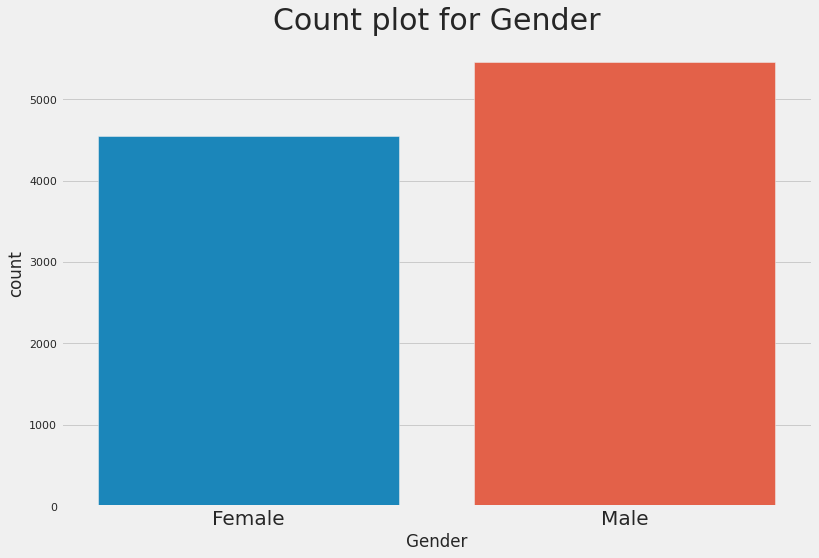

In [29]:
plt.figure(figsize=(12, 8))
gender_plot = sns.countplot(x=data.Gender)
gender_plot.set_title('Count plot for Gender', fontsize=30, pad=10)
gender_plot.set_xticklabels(['Female', 'Male'], fontsize=20)

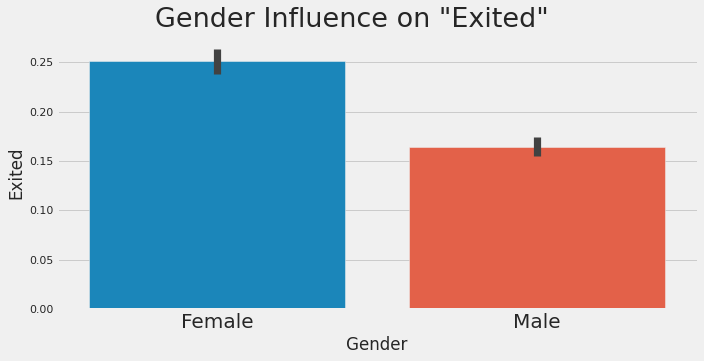

In [30]:
gen_cat_plot = sns.catplot(x='Gender',
                              y='Exited',
                              data=data,
                              aspect=2, kind='bar')
gen_cat_plot.fig.suptitle('Gender Influence on "Exited"', fontsize=27)
gen_cat_plot.fig.subplots_adjust(top=0.9)
gen_cat_plot.set_xticklabels(['Female', 'Male'], fontsize=20)

### Tenure

Tenure - the time of bond with company

<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/tenure.png?raw=true" width="100"/>

Text(0.5, 1.0, 'Count plot for Tenure')

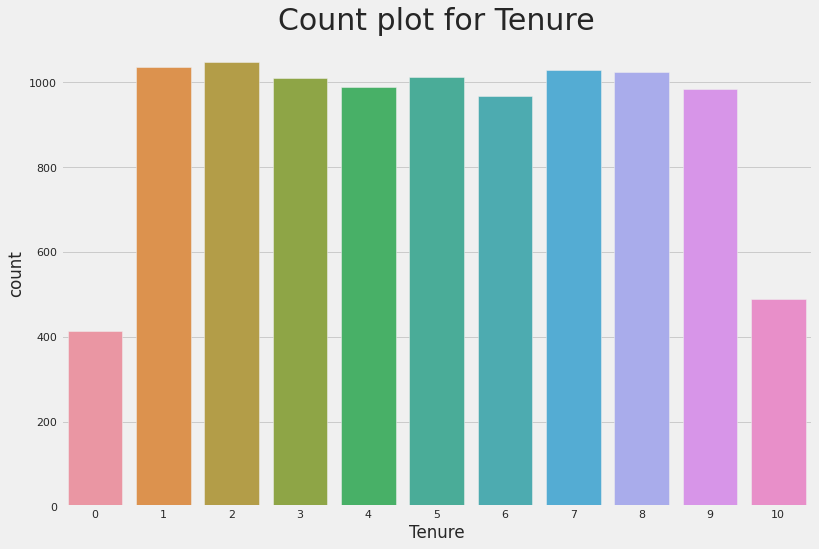

In [31]:
plt.figure(figsize=(12, 8))
tenure_plot = sns.countplot(x=data.Tenure)
tenure_plot.set_title('Count plot for Tenure', fontsize=30, pad=10)

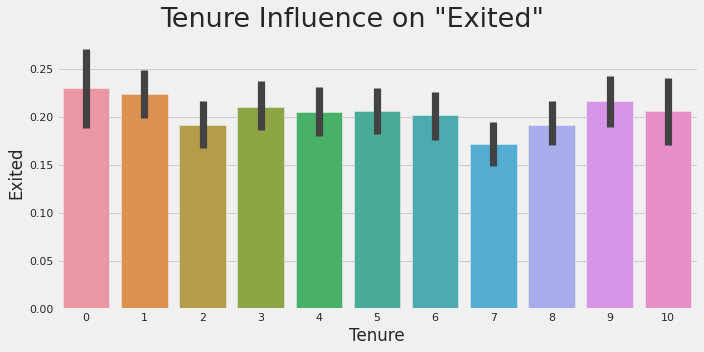

In [32]:
tenure_cat_plot = sns.catplot(x='Tenure',
                              y='Exited',
                              data=data,
                              aspect=2, kind='bar')
tenure_cat_plot.fig.suptitle('Tenure Influence on "Exited"', fontsize=27)
tenure_cat_plot.fig.subplots_adjust(top=0.9)

### Balance
The amount left with them

<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/balance.png?raw=true" width="100"/>

Text(0.5, 1.0, 'Balance Histogram ')

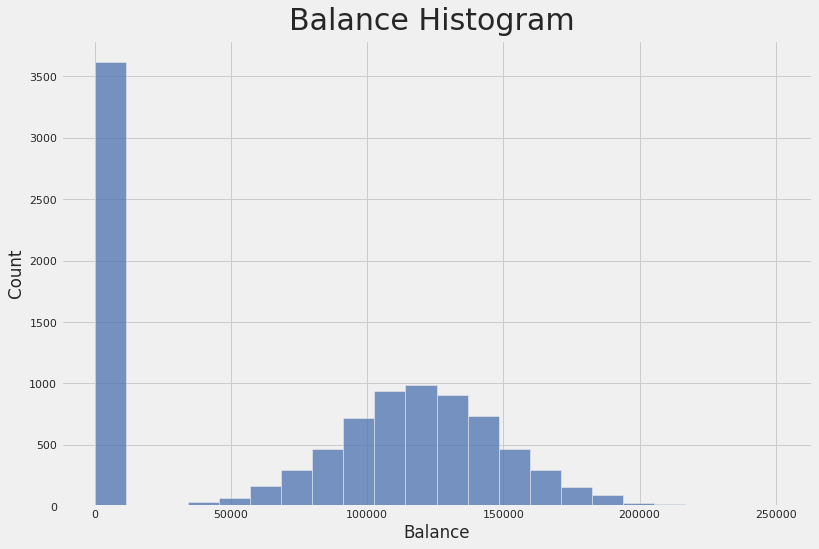

In [33]:
plt.figure(figsize=(12, 8))
balance_plot = sns.histplot(x=data.Balance)
balance_plot.set_title('Balance Histogram ', fontsize=30, pad=10)

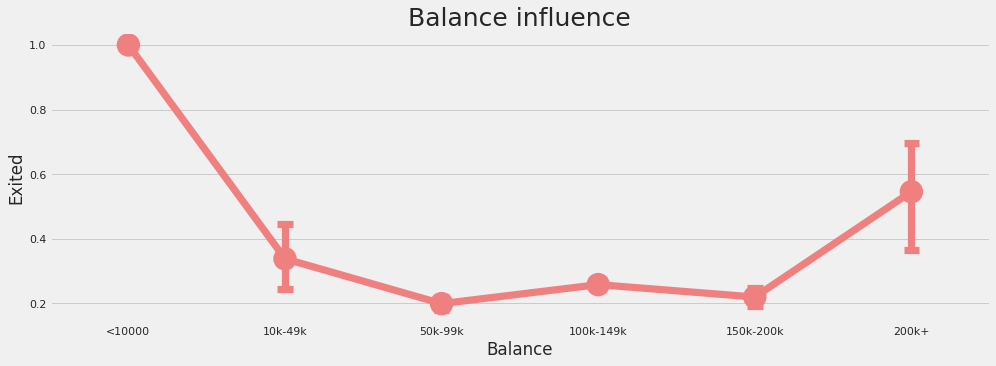

In [34]:
def balance_plot(data):

    col_name = 'Balance'
    balance_data = data[[col_name, 'Exited']]
    balance_data[col_name] = pd.cut(balance_data[col_name],
                               bins=[0, 10000, 50000, 100000,
                                     150000, 200000, 250000],
                               labels=['<10000',
                                       '10k-49k',
                                       '50k-99k',
                                       '100k-149k',
                                       '150k-200k',
                                       '200k+'])

    color = np.random.choice(colors, 1)[0]
    plt.figure(figsize=(15, 5))
    sns.pointplot(x=col_name, y='Exited',
                  dodge=0.1, capsize=.1, data=balance_data, color=color) \
                 .set_title(f'{col_name} influence', fontsize=25)


balance_plot(data)

Text(0.5, 1.0, 'Zero balance People')

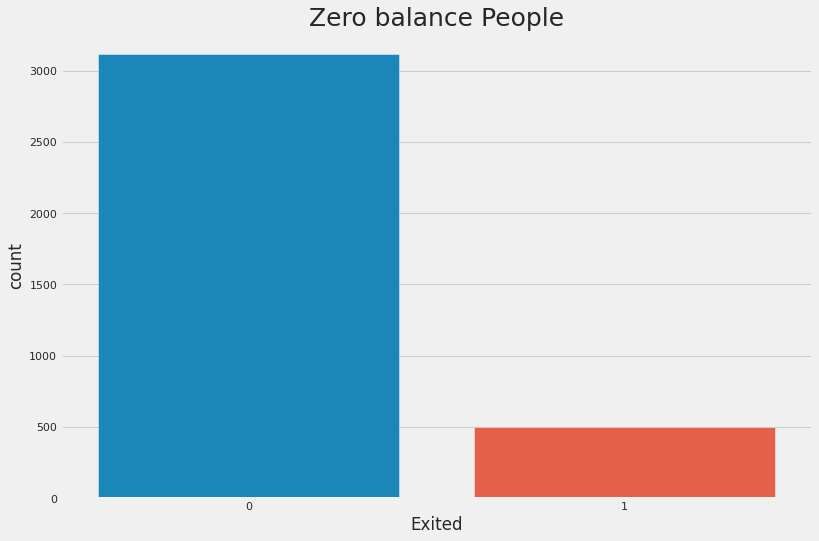

In [35]:
zero_balance = data[data.Balance == 0]

plt.figure(figsize=(12, 8))
zero_balance_plot = sns.countplot(x=zero_balance.Exited)
zero_balance_plot.set_title('Zero balance People', fontsize=25)

### Conclusion:
We see that most clients are those whose balance is zero. And it is in most cases they leave the company. It is most likely that a customer’s lack of funds will make him no longer a client of this company

### Number of products
The products they own

<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/num_of_prod.png?raw=true" width="100"/>

In [36]:
data.NumOfProducts.value_counts()

1    5084
2    4590
3     266
4      60
Name: NumOfProducts, dtype: int64

Text(0.5, 1.0, 'Count plot of "NumOfProducts"')

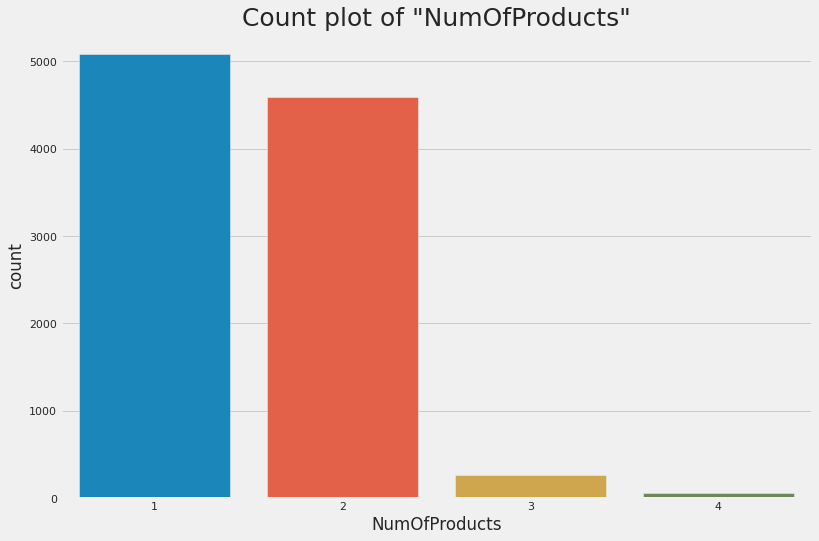

In [37]:
plt.figure(figsize=(12, 8))
num_prod_plot = sns.countplot(x=data.NumOfProducts)
num_prod_plot.set_title('Count plot of "NumOfProducts"', fontsize=25)

Text(0.5, 1.0, 'Number of products influence')

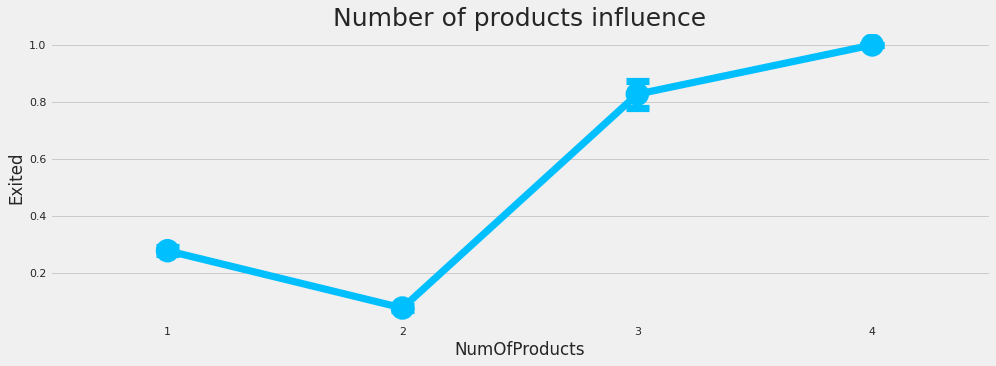

In [38]:
color = np.random.choice(colors, 1)[0]

plt.figure(figsize=(15, 5))
sns.pointplot(x='NumOfProducts', y='Exited', data=data,
              dodge=0.1, capsize=.1, color=color) \
             .set_title(f'Number of products influence', fontsize=25)

### Has a credit card
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/credit%20card.png?raw=true" width="100"/>

Text(0.5, 1.0, 'Count plot of "HasCrCard"')

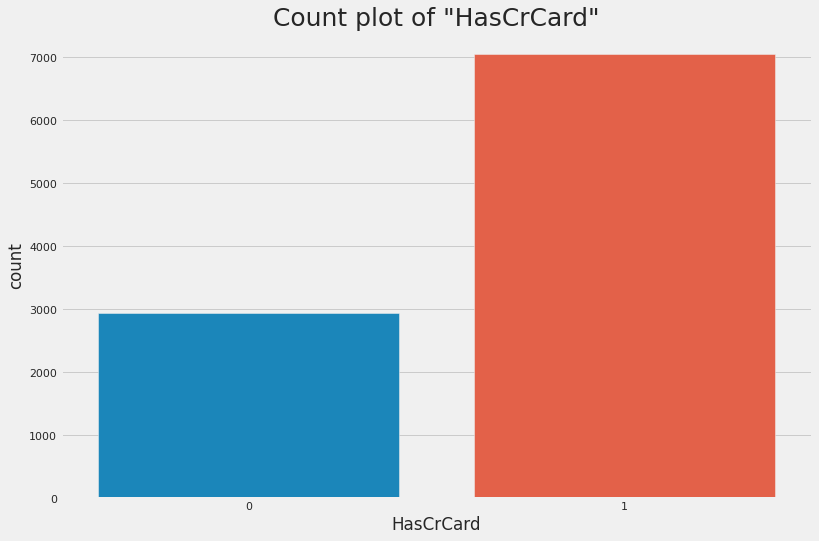

In [39]:
plt.figure(figsize=(12, 8))
credit_plot = sns.countplot(x=data.HasCrCard)
credit_plot.set_title('Count plot of "HasCrCard"', fontsize=25)

Text(0.5, 1.0, 'Credit card influence')

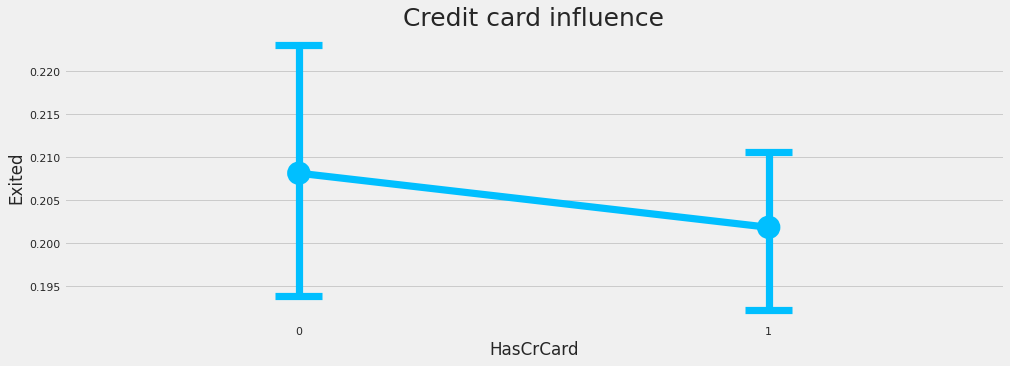

In [40]:
color = np.random.choice(colors, 1)[0]

plt.figure(figsize=(15, 5))
sns.pointplot(x='HasCrCard', y='Exited', data=data,
              dodge=0.1, capsize=.1, color=color) \
             .set_title(f'Credit card influence', fontsize=25)

### Is Active member ?
How active member they are

<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/active.png?raw=true" width="100"/>

Text(0.5, 1.0, 'Count plot for active members')

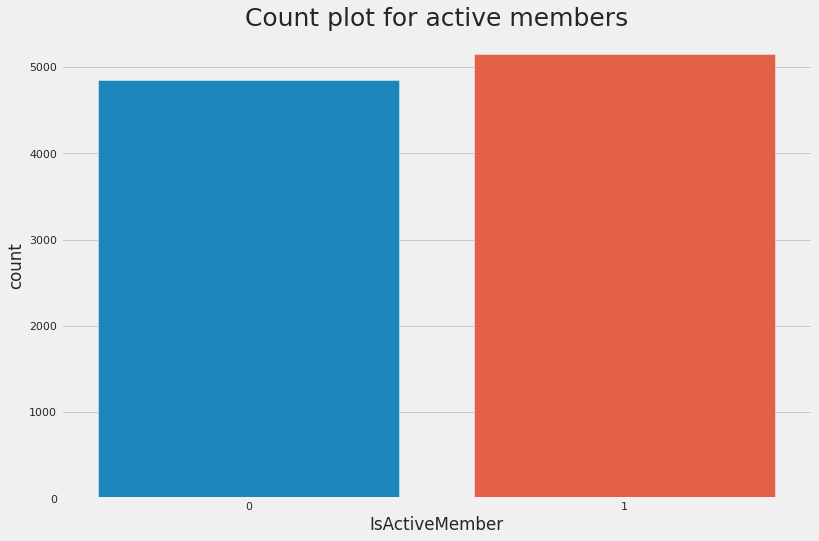

In [41]:
plt.figure(figsize=(12, 8))
active_plot = sns.countplot(x=data.IsActiveMember)
active_plot.set_title('Count plot for active members', fontsize=25)

Text(0.5, 1.0, 'Activity influence')

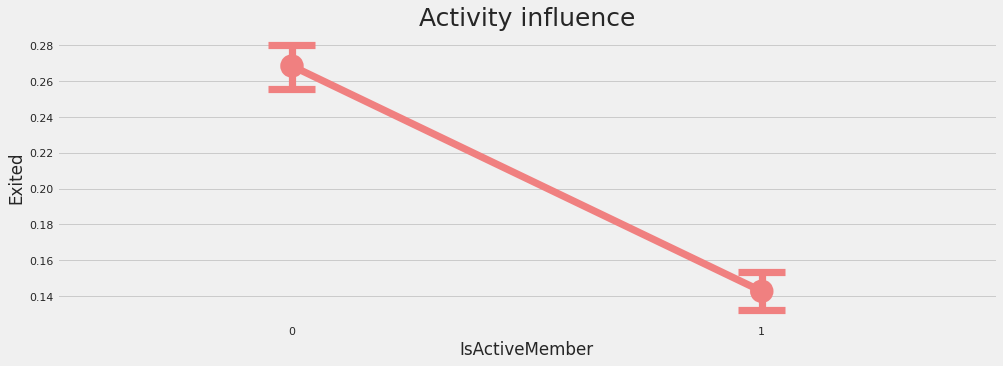

In [42]:
color = np.random.choice(colors, 1)[0]

plt.figure(figsize=(15, 5))
sns.pointplot(x='IsActiveMember', y='Exited', data=data,
              dodge=0.1, capsize=.1, color=color) \
             .set_title(f'Activity influence', fontsize=25)

### Estimated salary
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/estimated%20salary.png?raw=true" width="100"/>

Skewness for Estimated salary =======>>> 0.002


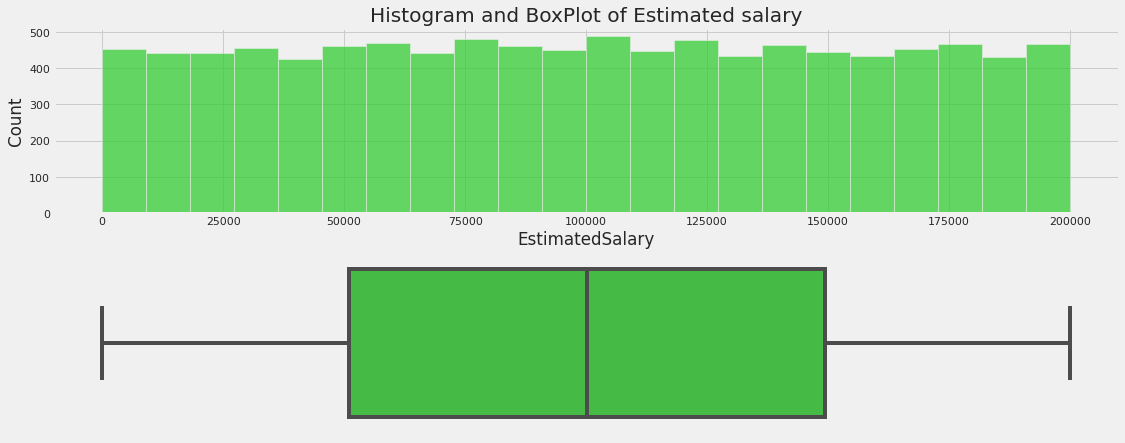

In [43]:
distribution_plot(data.EstimatedSalary, 'Estimated salary')

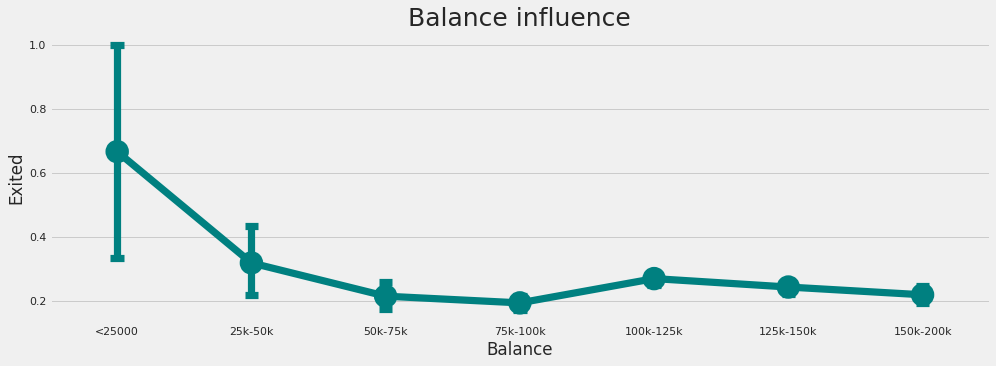

In [44]:

def salary_plot(data):

    col_name = 'Balance'
    salary_data = data[[col_name, 'Exited']]
    salary_data[col_name] = pd.cut(salary_data[col_name],
                               bins=[0, 25000, 50000, 75000,
                                     100000, 125000, 150000, 200000],
                               labels=['<25000',
                                       '25k-50k',
                                       '50k-75k',
                                       '75k-100k',
                                       '100k-125k',
                                       '125k-150k',
                                       '150k-200k'])

    color = np.random.choice(colors, 1)[0]
    plt.figure(figsize=(15, 5))
    sns.pointplot(x=col_name, y='Exited',
                  dodge=0.1, capsize=.1, data=salary_data, color=color) \
                 .set_title(f'{col_name} influence', fontsize=25)


salary_plot(data)

## Heatmap

<AxesSubplot:>

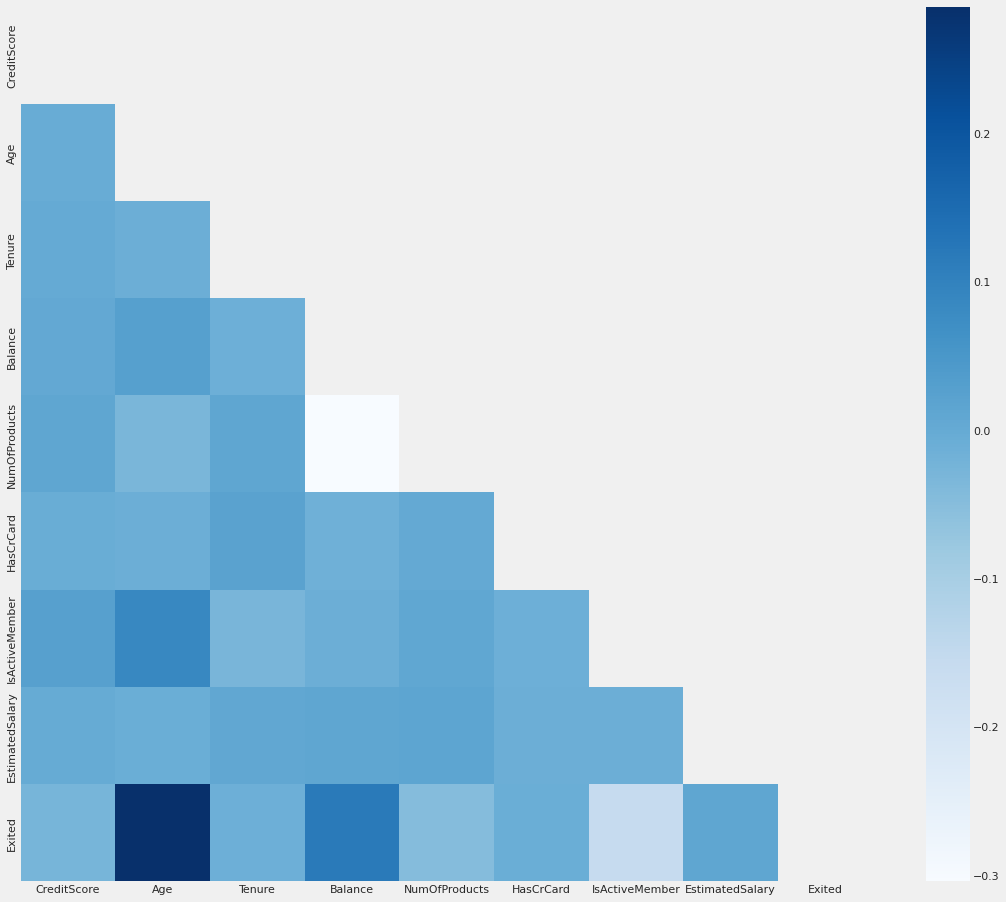

In [45]:
plt.figure(figsize=(17, 15))

corr_mask = np.triu(data.corr())
h_map = sns.heatmap(data.corr(), mask=corr_mask, cmap='Blues')
h_map

# Data for Model
<img height="100" src="https://github.com/GeorgeGalaxy/PhotosFor.../blob/main/icons/prepare.png?raw=true" width="100"/>

In [46]:
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


### Work with categorical columns

In [47]:
cat_columns = [cname for cname in data.columns
                        if data[cname].dtype == 'object']

encoder = preprocessing.LabelEncoder()

for col in cat_columns:
    data[col] = encoder.fit_transform(data[col])

In [48]:
# Checking the result of encoding
data.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,0,0,42,2,0.00,1,1,1,101348.88,1
1,608,2,0,41,1,83807.86,1,0,1,112542.58,0
2,502,0,0,42,8,159660.80,3,1,0,113931.57,1
3,699,0,0,39,1,0.00,2,0,0,93826.63,0
4,850,2,0,43,2,125510.82,1,1,1,79084.10,0
